### Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [3]:
df1=pd.read_csv("StudentsPerformance.csv")

<b><i>First 5 rows</i></b>

In [4]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


<b><i>Checking for Null values</i></b>

In [5]:
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<b>---No null values are present in the dataset---<b>

<b><i>Datatypes of all columns</i></b>

In [6]:
df1.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
## Total length of dataset
len(df1)

1000

In [8]:
## a brief summary of dataset
df1.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


### 1. Find out how many males and females participated in the test

<b><i>Exact count of each gender</i></b>

In [9]:
df1['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [10]:
plt.rcParams['font.size'] = 15

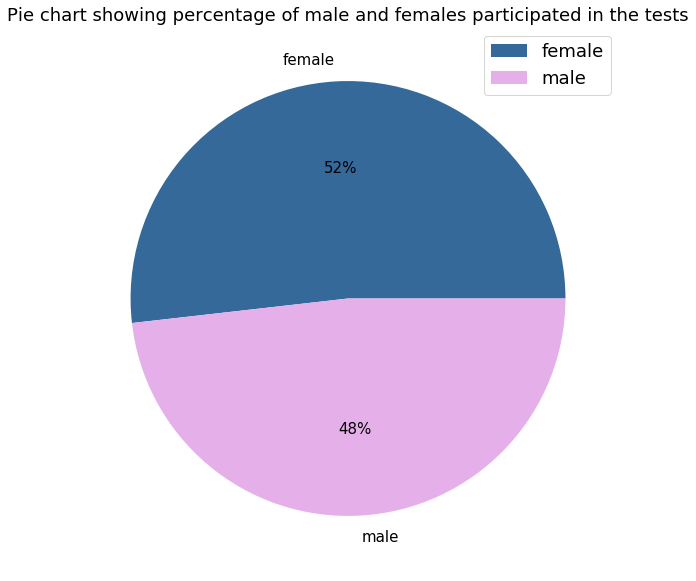

In [12]:
plt.figure(figsize=(10,10))
plt.title("Pie chart showing percentage of male and females participated in the tests")
colors = ['#34699A','#E5B0EA']
plt.pie(df1['gender'].value_counts(), labels = df1['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(df1['gender'].unique(),loc="upper right",fontsize='large')
plt.show()

### 2. What do you think about the students' parental level of education? 

##### Exact count of parents belongs to different level of education

In [13]:
df1['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

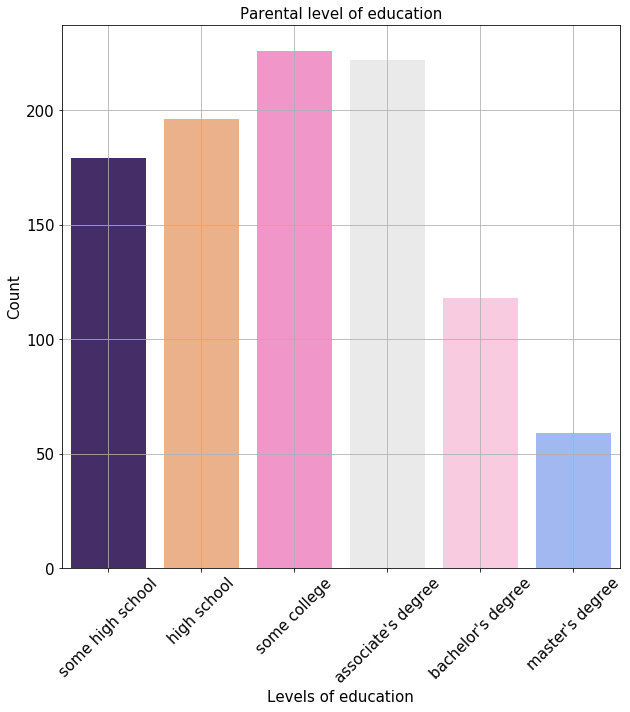

In [13]:
plt.figure(figsize=(10,10))
plt.title("Parental level of education",fontsize=15)
sns.countplot(df1['parental level of education'],palette=['#432371',"#FAAE7B",'#FF87CA','#EAEAEA','#FFC4E1','#94B3FD'])
plt.xlabel("Levels of education",fontsize=15)
plt.xticks(rotation=45)
plt.ylabel("Count",fontsize=15)
plt.grid()
plt.show()

1<b>. Majority of the parents have at least some college or associate's degree.</b><br>
2<b>. 179 parents have only some high school level education.</b><br>
3<b>. 59 parents are having a master's degree</b>

### 3. Who scores the most on average for math, reading and writing based on  Gender. 

In [15]:
## calculating mean for each score
m1=np.mean(df1['math score'])
m2=np.mean(df1['reading score'])
m3=np.mean(df1['writing score'])

In [16]:
df2=df1[['math score','gender']][df1['math score']>=m1].groupby("gender",as_index=False).count()

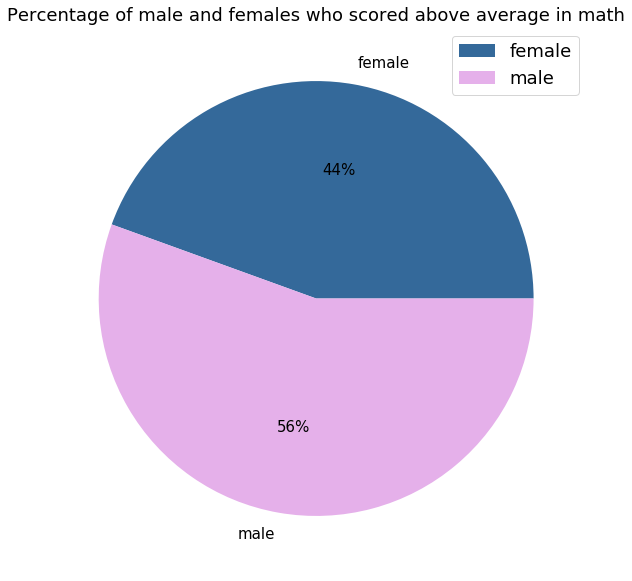

In [17]:
plt.figure(figsize=(10,10))
plt.title("Percentage of male and females who scored above average in math")
colors = ['#34699A','#E5B0EA']
plt.pie(df2['math score'], labels = df2['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(df2['gender'].unique(),loc="upper right",fontsize='large')
plt.show()

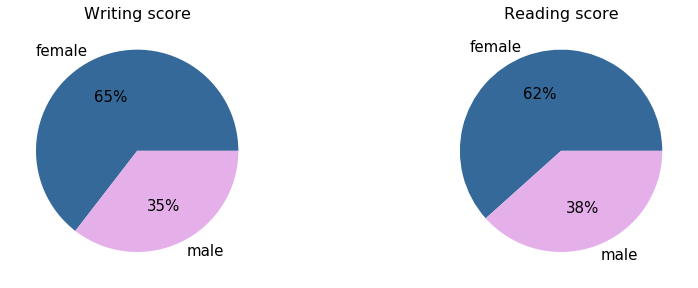

In [24]:
plt.figure(figsize=(12,8))

## first graph
df2=df1[['gender','writing score']][df1['writing score']>=m3].groupby("gender",as_index=False).count()
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.pie(df2['writing score'], labels = df2['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Writing score",fontsize=16)


## second graph
df3=df1[['gender','reading score']][df1['reading score']>=m2].groupby("gender",as_index=False).count()
plt.subplot(2,2,2)## location of the graph
plt.pie(df3['reading score'], labels = df3['gender'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Reading score",fontsize=16)
plt.tight_layout()

In [54]:
## Count
df1[['gender','reading score']][df1['reading score']>=m2].groupby("gender",as_index=False).count()

,gender,reading score
0,female,318
1,male,198


In [155]:
## Count
df1[['gender','writing score']][df1['writing score']>=m3].groupby("gender",as_index=False).count()

,gender,writing score
0,female,333
1,male,183


### Based on test preparation course

In [25]:
df2=df1[['test preparation course','math score']][df1['math score']>=m1].groupby("test preparation course",as_index=False).count()

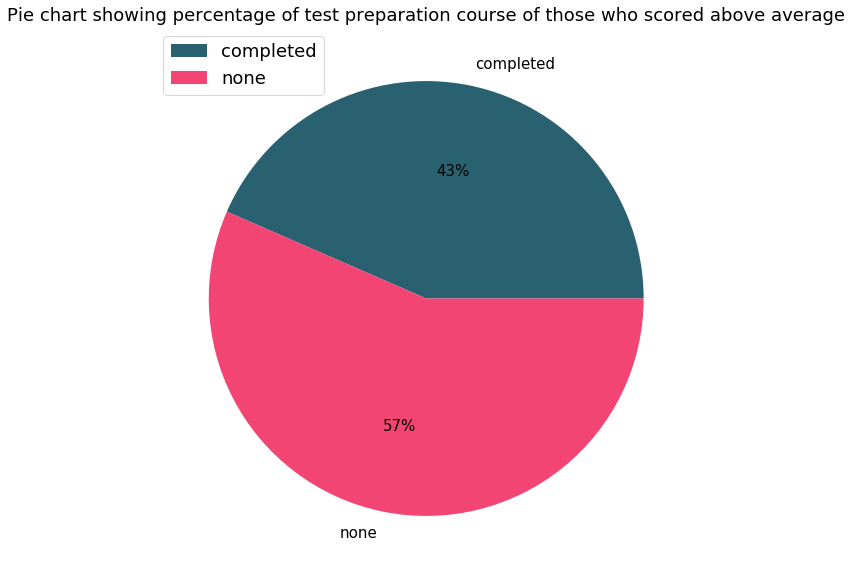

In [27]:
plt.figure(figsize=(10,10))
plt.title("Pie chart showing percentage of test preparation course of those who scored above average")
colors = ['#2A6171','#F34573']
plt.pie(df2['math score'], labels = df2['test preparation course'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(df2['test preparation course'].unique(),loc="upper left",fontsize='large')
plt.show()

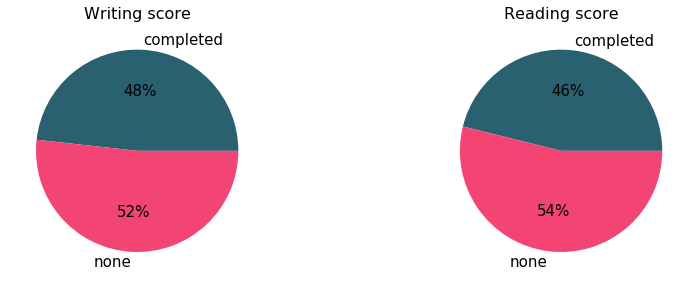

In [28]:
plt.figure(figsize=(12,8))

## first graph
df2=df1[['test preparation course','writing score']][df1['writing score']>=m3].groupby("test preparation course",as_index=False).count()
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.pie(df2['writing score'], labels = df2['test preparation course'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Writing score",fontsize=16)


## second graph
df3=df1[['test preparation course','reading score']][df1['reading score']>=m2].groupby("test preparation course",as_index=False).count()
plt.subplot(2,2,2)## location of the graph
plt.pie(df3['reading score'], labels = df3['test preparation course'].unique(), colors = colors, autopct='%.0f%%')
plt.title("Reading score",fontsize=16)
plt.tight_layout()

In [29]:
## Count
df1[['test preparation course','reading score']][df1['reading score']>=m2].groupby("test preparation course",as_index=False).count()

,test preparation course,reading score
0,completed,238
1,none,278


In [30]:
## Count
df1[['test preparation course','writing score']][df1['writing score']>=m3].groupby("test preparation course",as_index=False).count()

,test preparation course,writing score
0,completed,249
1,none,267


### 4. What do you think about the scoring variation for math, reading and writing based on Gender 

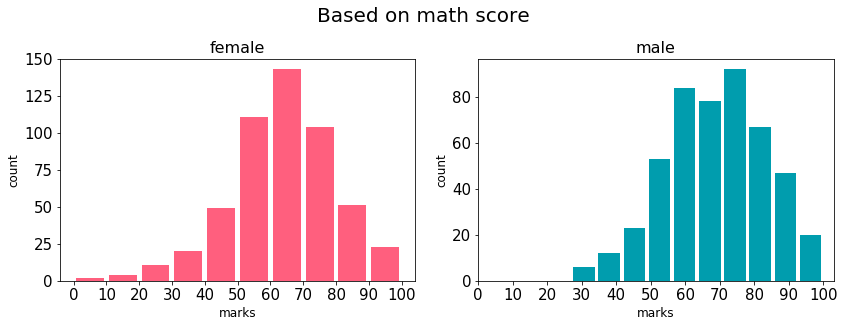

In [45]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on math score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.hist(df1['math score'][df1["gender"]=='female'],color='#FF5F7E',rwidth=0.85,bins=10)
plt.title("female",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(df1['math score'][df1["gender"]=='male'],color='#009DAE',rwidth=0.85,bins=10)
plt.title("male",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)

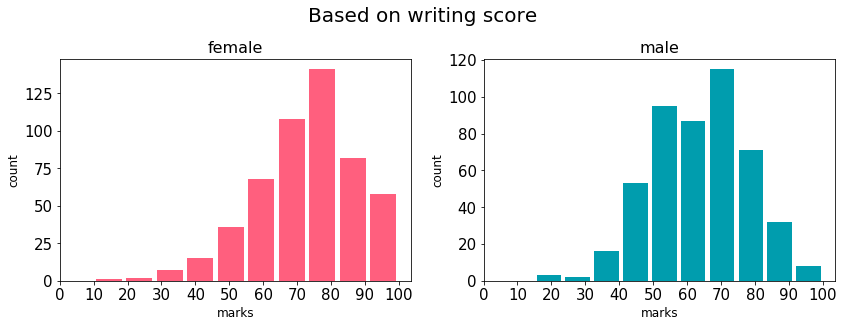

In [44]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on writing score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(df1['writing score'][df1["gender"]=='female'],color='#FF5F7E',rwidth=0.85,bins=10)
plt.title("female",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(df1['writing score'][df1["gender"]=='male'],color='#009DAE',rwidth=0.85,bins=10)
plt.title("male",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

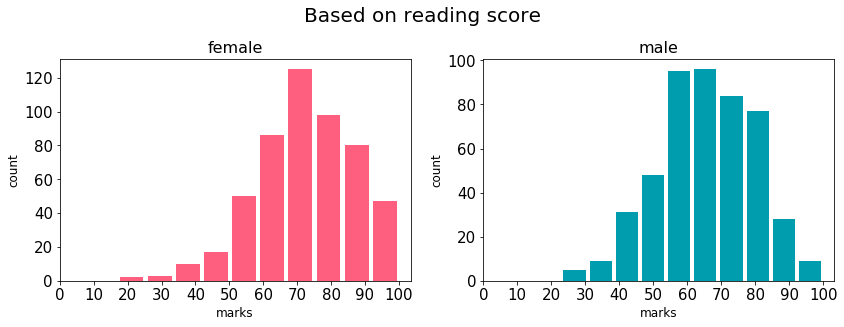

In [46]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on reading score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(df1['reading score'][df1["gender"]=='female'],color='#FF5F7E',rwidth=0.85,bins=10)
plt.title("female",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(df1['reading score'][df1["gender"]=='male'],color='#009DAE',rwidth=0.85,bins=10)
plt.title("male",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

### Variation based on test preparation course

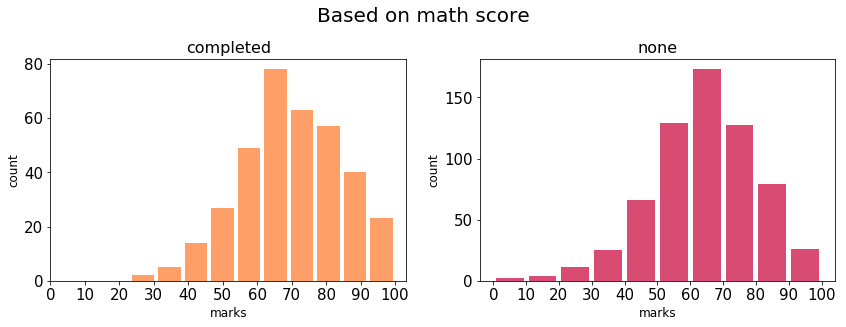

In [47]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on math score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph, screen divided into a 2*1 matrix
plt.hist(df1['math score'][df1["test preparation course"]=='completed'],color='#FF9F68',rwidth=0.85,bins=10)
plt.title("completed",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(df1['math score'][df1["test preparation course"]=='none'],color='#D84C73',rwidth=0.85,bins=10)
plt.title("none",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)

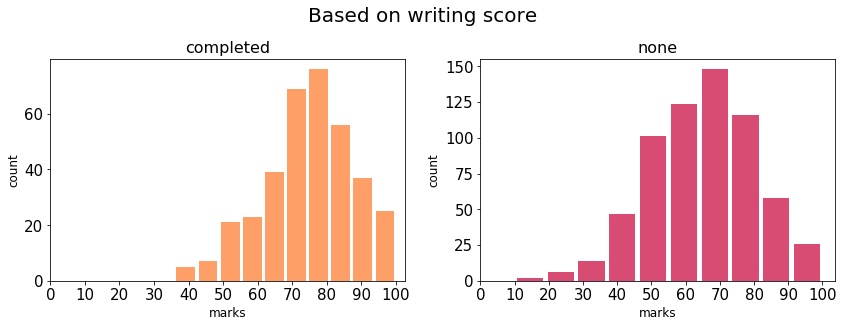

In [48]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on writing score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(df1['writing score'][df1["test preparation course"]=='completed'],color='#FF9F68',rwidth=0.85,bins=10)
plt.title("completed",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(df1['writing score'][df1["test preparation course"]=='none'],color='#D84C73',rwidth=0.85,bins=10)
plt.title("none",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

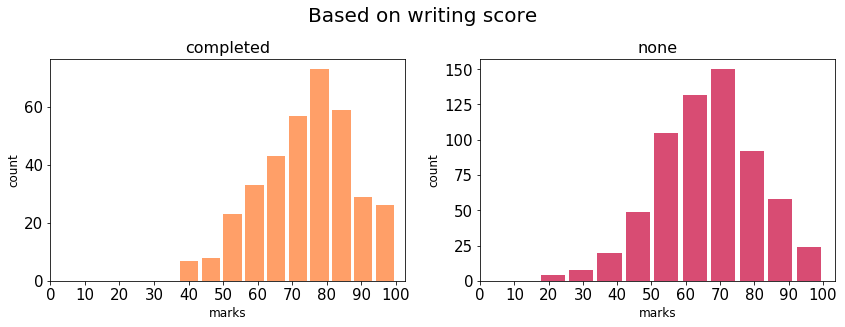

In [50]:
plt.figure(figsize=(12,8))
plt.suptitle("Based on writing score", size=20)
## first graph
plt.subplot(2,2,1)## location of the graph
plt.hist(df1['reading score'][df1["test preparation course"]=='completed'],color='#FF9F68',rwidth=0.85,bins=10)
plt.title("completed",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

## second graph
plt.subplot(2,2,2)## location of the graph
plt.hist(df1['reading score'][df1["test preparation course"]=='none'],color='#D84C73',rwidth=0.85,bins=10)
plt.title("none",fontsize=16)
plt.xlabel("marks",fontsize=12)
plt.ylabel("count",fontsize=12)
plt.xticks(np.arange(0,110,10))

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.show()

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [52]:
df4=df1.sort_values(by=['math score'], inplace=False, ascending=False)
df4=df4.reset_index(drop=True)

<b>The top 25% students are<b>

In [55]:
len(df1)

1000

In [56]:
## 25% of 1000 = 250
df4[0:250]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,bachelor's degree,standard,completed,100,100,100
1,male,group A,some college,standard,completed,100,96,86
2,female,group E,some college,standard,none,100,92,97
3,female,group E,associate's degree,standard,none,100,100,100
4,female,group E,bachelor's degree,standard,none,100,100,100
5,male,group D,some college,standard,completed,100,97,99
6,male,group E,associate's degree,free/reduced,completed,100,100,93
7,male,group E,some college,standard,completed,99,87,81
8,female,group E,bachelor's degree,standard,completed,99,100,100
9,female,group E,high school,standard,none,99,93,90
